In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/adiamtesfaselassie/Documents/Spring2023/ANLY521/JobPosts/Adiam/topic_df.csv')

In [18]:
X,y = df.iloc[:,1:-1], df.iloc[:, -1]

In [19]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [21]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100,200,300, 400, 500, 600], 'max_depth': [3,5,7,9, 11]}
search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
search.fit(X_tr, y_tr)
bp = search.best_params_
print(bp)

{'max_depth': 9, 'n_estimators': 500}
CPU times: user 35 s, sys: 435 ms, total: 35.5 s
Wall time: 35.5 s


In [15]:
rfc = RandomForestClassifier(n_estimators = bp['n_estimators'], max_depth = bp['max_depth'])
rfc.fit(X_tr, y_tr)
print('acc: ', np.mean(cross_val_score(rfc, X_tr, y_tr, scoring = 'accuracy', cv=5)))
print('acc: ', np.mean(cross_val_score(rfc, X_tr, y_tr, scoring = 'accuracy', cv=5)))
print(rfc.predict(X_te))

acc:  0.7555555555555555
acc:  0.762962962962963
['Data Engineer ' 'Quality Assurance' 'Marketing '
 'Healthcare Management ' 'Software Developer ' 'Marketing '
 'Quality Assurance' 'Financial Analyst ' 'Data Engineer '
 'Financial Analyst ' 'Marketing ' 'Healthcare Management ' 'Marketing '
 'Marketing ' 'Data Engineer ' 'Marketing ' 'Healthcare Management '
 'Software Developer ' 'Healthcare Management ' 'Software Developer '
 'Quality Assurance' 'Financial Analyst ' 'Software Developer '
 'Healthcare Management ' 'Marketing ' 'Data Engineer '
 'Quality Assurance' 'Quality Assurance' 'Financial Analyst '
 'Healthcare Management ' 'Software Developer ' 'Financial Analyst '
 'Financial Analyst ' 'Quality Assurance' 'Quality Assurance'
 'Software Developer ' 'Software Developer ' 'Data Engineer ' 'Marketing '
 'Quality Assurance' 'Quality Assurance' 'Healthcare Management '
 'Healthcare Management ' 'Financial Analyst ' 'Quality Assurance']


<Axes: >

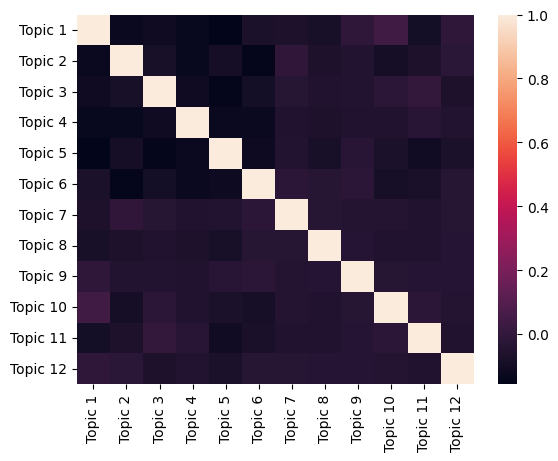

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(X_tr.corr())